In [ ]:
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/raw/master/deploy.prototxt.txt
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/raw/master/res10_300x300_ssd_iter_140000.caffemodel


--2020-09-21 17:01:41--  https://github.com/RufinaMay/CV2019Fall_Pictures/raw/master/deploy.prototxt.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RufinaMay/CV2019Fall_Pictures/master/deploy.prototxt.txt [following]
--2020-09-21 17:01:41--  https://raw.githubusercontent.com/RufinaMay/CV2019Fall_Pictures/master/deploy.prototxt.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28092 (27K) [text/plain]
Saving to: ‘deploy.prototxt.txt’

deploy.prototxt.txt 100%[===================>]  27.43K  --.-KB/s    in 0.01s   

2020-09-21 17:01:41 (2.12 MB/s) - ‘deploy.prototxt.txt’ saved [28092/28092]

--20

In [2]:
import cv2
import time
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

clear_output()
print('Download completed!')

Download completed!


In [36]:
 def read_and_resize_image(filename, grayscale = False, fx= 1, fy=1):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result
def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

def process_video(video_path, frame_process,num_frames=30, start_frame=0):
  vid = cv2.VideoCapture(video_path)
  vid.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
  try:
    while vid.get(cv2.CAP_PROP_POS_FRAMES) < start_frame + num_frames:
      ret, frame = vid.read()
      if not ret:
        vid.release()
        break
        
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

      if frame_process is not None:
        frame = detect_faces(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame)
             
  except KeyboardInterrupt:
    vid.release()
eye_cascade_pulp = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
# print(eye_cascade_pulp)
# start = time.time()

  # print(f'time taken: {time.time()-start}')
# print(len(eyes))
    
def detect_faces(frame) -> (np.array, list):
    # < your code here >
   

  (h, w) = frame.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0), swapRB = False)
  
  net.setInput(blob)
  detections = net.forward()
  
    # filter out weak detections
  for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
  
    if confidence > 0.30:
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")

      text = "{:.2f}%".format(confidence * 100)
      y = startY - 10 if startY - 10 > 10 else startY + 10

      cv2.putText(frame, text, (startX, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)  
      
      cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 2)
    # showInRow([frame])
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  eyes = eye_cascade_pulp.detectMultiScale(gray,1.1,3, 10)
  
  for (x,y,w,h) in eyes:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2) 
  return frame #FD.detect(frame)


<CascadeClassifier 0x7f2bc0163070>
3


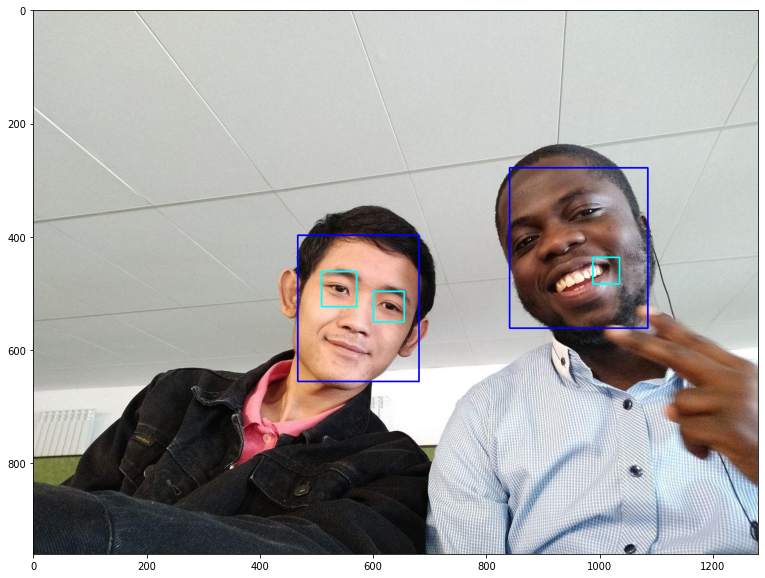

In [35]:
img_pulp = read_and_resize_image('/content/img_ann.jpg', grayscale = False, fx= 1, fy=1)
img_pulp_copy= img_pulp.copy()
net = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')
confidence = 0.5
img_pulp_copy = img_pulp.copy()
 
(h, w) = img_pulp.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(img_pulp, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0), swapRB = False)
 
net.setInput(blob)
detections = net.forward()
faces=[]
  # filter out weak detections
for i in range(detections.shape[2]):
  confidence = detections[0, 0, i, 2]
 
  if confidence > 0.50:
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    face = (startX, startY, endX-startX, endY-startY)
    faces.append(face)
    cv2.rectangle(img_pulp_copy, (startX, startY), (endX, endY), (0, 0, 255), 2)

eye_cascade_pulp = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
print(eye_cascade_pulp)
# start = time.time()
gray = cv2.cvtColor(img_pulp, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade_pulp.detectMultiScale(gray,1.2,4, 7)
  # print(f'time taken: {time.time()-start}')
print(len(eyes))
for (x,y,w,h) in eyes:
    cv2.rectangle(img_pulp_copy,(x,y),(x+w,y+h),(0,255,255),2)
showInRow([img_pulp_copy])     

In [ ]:
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/raw/d0c95c6b3ed54dbb1c6eb7117a8202357617af24/okgo2.mp4?raw=true -O vid.mp4


--2020-09-17 06:48:58--  https://github.com/RufinaMay/CV2019Fall_Pictures/raw/d0c95c6b3ed54dbb1c6eb7117a8202357617af24/okgo2.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RufinaMay/CV2019Fall_Pictures/d0c95c6b3ed54dbb1c6eb7117a8202357617af24/okgo2.mp4 [following]
--2020-09-17 06:48:58--  https://raw.githubusercontent.com/RufinaMay/CV2019Fall_Pictures/d0c95c6b3ed54dbb1c6eb7117a8202357617af24/okgo2.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48785309 (47M) [application/octet-stream]
Saving to: ‘vid.mp4’

vid.mp4             100%[===================>]  46.52M  39.1MB/s    in 1.2s 

In [13]:
# !wget "https://drive.google.com/uc?export=view&id=1skt6SmYqjQ_jWh4jIkpe3njILEIaS72-" -O vid.mp4
from IPython.display import clear_output


!wget "https://drive.google.com/uc?export=view&id=1Vsd11D1tHcxeU9PATwsq10UR0TNfQGhE" -O video_hafeez.mp4
!wget "https://drive.google.com/uc?export=view&id=1Uwnh-wEgAGp9g3Gkzc6IK9TLOoey96JN" -O video_hafeez1.mp4
clear_output()

In [37]:
frame_width,frame_height = 1280,720

# out = cv2.VideoWriter('output_multiple.mp4', cv2.VideoWriter_fourcc('M','J','P','G'), 20, (480, 270))
out = cv2.VideoWriter('output_multiple.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (480, 270))
# out = cv2.VideoWriter('output_multiple.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 20, (640,360))

# detect_faces = detect_faces(frame)
# You have to define a function detect_faces(frame) that  takes a frame, does the processing and returns the output frame!
process_video("/content/video_hafeez1.mp4", out, 300,0)

out.release()

In [12]:

from IPython.display import clear_output
print(2)
clear_output()